In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load pretrained model (tanpa top layer, untuk ekstraksi fitur)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return model.predict(img_array).flatten()

# Iterasi semua gambar dalam dataset
dataset_path = "./batik_dataset/Batik Pala/"
features = []
image_paths = []

for img_file in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_file)
    image_paths.append(img_path)
    features.append(extract_features(img_path, model))

features = np.array(features)

# Simpan features dan path
np.save("features.npy", features)
np.save("image_paths.npy", image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [2]:
from sklearn.metrics.pairwise import cosine_similarity

# Load extracted features and image paths
features = np.load("features.npy")
image_paths = np.load("image_paths.npy")

def find_similar_images(query_image_path, model, features, image_paths, top_n=10):
    query_features = extract_features(query_image_path, model)
    similarities = cosine_similarity([query_features], features)[0]
    indices = np.argsort(similarities)[::-1][:top_n]
    return [(image_paths[i], similarities[i]) for i in indices]

# Query image
query_image_path = "peh.jpg"
similar_images = find_similar_images(query_image_path, model, features, image_paths)

# Print results
for img_path, similarity in similar_images:
    print(f"Image: {img_path}, Similarity: {similarity:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Image: ./batik_dataset/Batik Pala/16.jpg, Similarity: 0.9993
Image: ./batik_dataset/Batik Pala/2.jpg, Similarity: 0.9942
Image: ./batik_dataset/Batik Pala/48.jpg, Similarity: 0.9939
Image: ./batik_dataset/Batik Pala/3.jpg, Similarity: 0.9925
Image: ./batik_dataset/Batik Pala/52.jpg, Similarity: 0.9912
Image: ./batik_dataset/Batik Pala/54.jpg, Similarity: 0.9912
Image: ./batik_dataset/Batik Pala/27.jpg, Similarity: 0.9909
Image: ./batik_dataset/Batik Pala/53.jpg, Similarity: 0.9882
Image: ./batik_dataset/Batik Pala/43.jpg, Similarity: 0.9880
Image: ./batik_dataset/Batik Pala/24.jpg, Similarity: 0.9876


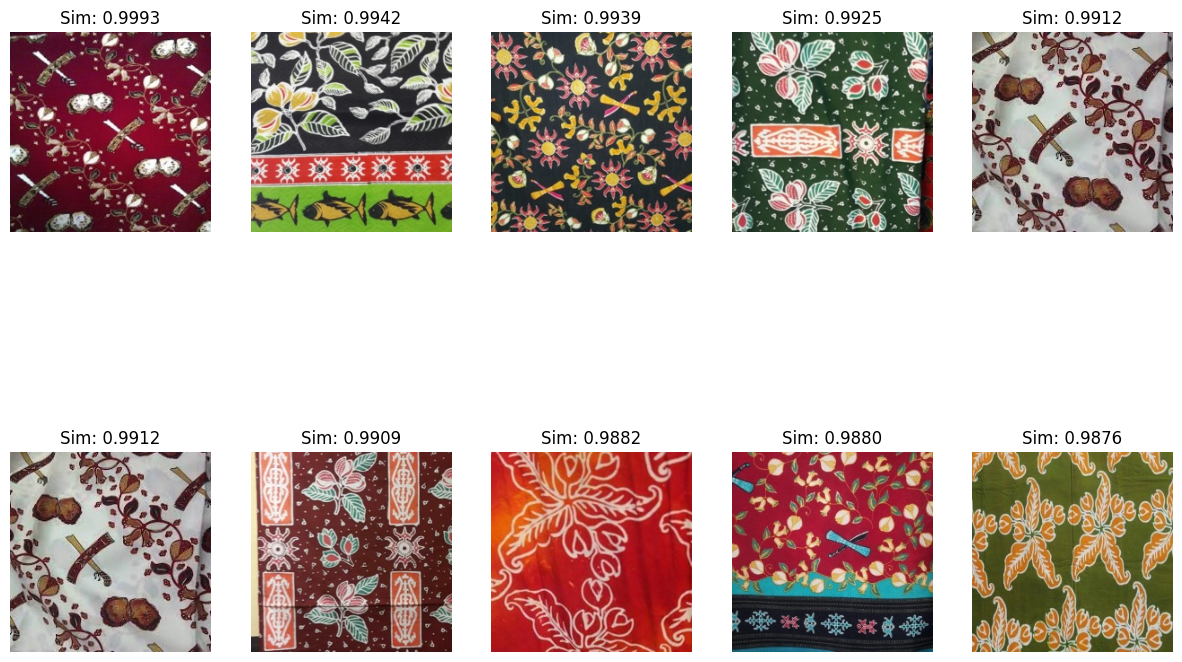

In [3]:
import matplotlib.pyplot as plt

def display_similar_images(similar_images):
    plt.figure(figsize=(15, 10))
    for i, (img_path, similarity) in enumerate(similar_images):
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Sim: {similarity:.4f}")
        plt.axis("off")
    plt.show()

display_similar_images(similar_images)
